In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/My Drive/LDS8_Le Quang Anh Tu/week3/Chapter7'

/content/gdrive/My Drive/LDS8_Le Quang Anh Tu/week3/Chapter7


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, LSTM, Activation, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

%matplotlib inline

In [ ]:
#import zipfile
#COMMENTS_FT = 'comments_words'
#ZIP_FILE = 'data/Youtube-Spam-Collection-v1.zip'
#DIR_TO_EXTRACT = 'data/'
#EMBED_DIMENSION = 50
#extract the data
#zip_ref = zipfile.ZipFile(ZIP_FILE, 'r')
#zip_ref.extractall(DIR_TO_EXTRACT)
#zip_ref.close()

In [ ]:
comments_df_list =[]
comments_file = ['Youtube01-Psy.csv','Youtube02-KatyPerry.csv', 'Youtube03-LMFAO.csv', 'Youtube04-Eminem.csv', 'Youtube05-Shakira.csv']
for f in comments_file:
  df = pd.read_csv(f,header=0)
  comments_df_list.append(df)
comments_df = pd.concat(comments_df_list)
comments_df = comments_df.sample(frac=1.0)
print(comments_df.shape)
comments_df.head()

(1956, 5)


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
239,_2viQ_Qnc6_bcubCrs8YncM7B9016OeduR9RR-cKRb4,Kenji Bustalinio,2013-10-02T11:46:51.783000,:),0
5,z13rcnlyamexujnf022vcrb5qouetpjz404,Brian Brai,2015-05-28T08:58:10.905000,Shuffle﻿,0
318,LneaDw26bFuR9smjLJUhkDMS-5WcFp80WGZVHVi9Tsw,Butter Forbes,NaN,Hello. I only made ONE Eminem song on my chann...,1
230,z12gf55w4pr0ibswj04cfzyb4my1zbnjsps0k,Andrea Incollingo,2015-04-21T14:52:10.879000,Check out this video on YouTube:﻿,1
330,z12zw32jkmqxc1eba04chv2renb2gnaxiww0k,Lindsay Reynolds,2015-01-19T00:40:40.097000,Check out this playlist on YouTube:﻿,1


In [ ]:
comments_df.columns

Index(['COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT', 'CLASS'], dtype='object')

In [ ]:
df = comments_df.drop(['COMMENT_ID', 'AUTHOR', 'DATE'], axis=1)
df.head()

,CONTENT,CLASS
239,:),0
5,Shuffle﻿,0
318,Hello. I only made ONE Eminem song on my chann...,1
230,Check out this video on YouTube:﻿,1
330,Check out this playlist on YouTube:﻿,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 239 to 65
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CONTENT  1956 non-null   object
 1   CLASS    1956 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 45.8+ KB


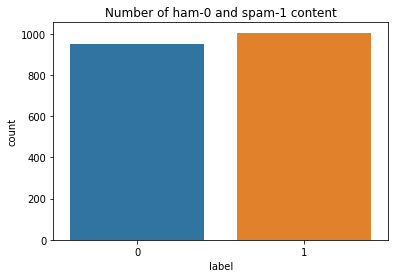

In [ ]:
sns.countplot(df.CLASS)
plt.xlabel('label')
plt.title('Number of ham-0 and spam-1 content')
plt.show()


In [ ]:
X = df.CONTENT
y = df.CLASS

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [ ]:
max_words = 1000 #chi dung 1000 tu quan trong
max_len = 50
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
print(sequences)
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)#them cac padding 0 vao sequences

[[1, 124, 18, 51, 173, 3, 19, 44, 177, 48, 96, 2], [117, 151, 27, 197, 2], [11, 10, 3, 17, 12, 21, 2], [26, 5, 8, 21, 32, 6, 932, 590, 933, 21], [9, 446, 190, 20, 2], [30, 186], [1, 267, 934], [197, 102, 247], [591, 935, 105, 23, 447, 26, 5, 20, 22, 448, 447], [1, 78, 215, 335, 98, 3, 113, 735, 289, 56, 225, 206, 71, 79, 936, 361, 31, 2], [197], [107, 8, 268], [236, 40, 14, 6, 937, 938, 939], [24, 26, 216, 248, 336, 6, 10, 337, 20, 107, 207, 15, 67, 80, 108, 7, 1, 44, 592, 55, 13], [198, 52, 8, 32, 1, 55, 593, 398, 252, 2], [3, 19, 14, 131, 2], [226], [1, 30, 3, 19, 38, 5, 4, 148, 72, 9, 62, 594, 2], [6, 449, 450, 227, 451, 452, 164, 49, 253, 165, 16, 60, 131, 6, 6, 449, 450, 227, 451, 452, 164, 49, 253, 165, 16, 60, 118, 6, 6, 449, 450, 227, 451, 452, 164, 49, 253, 165, 16, 60, 6, 103, 30, 4, 139, 9, 453, 595, 174, 6, 164, 36, 940, 399, 941, 36, 940, 399, 941, 6, 2], [63, 228, 11, 10, 8, 33, 17, 87, 2], [28, 942, 27, 159, 57, 99, 736, 943, 4, 338, 362, 43, 944, 16], [11, 10, 3, 17, 12

In [ ]:
sequences_matrix

array([[  0,   0,   0, ...,  48,  96,   2],
       [  0,   0,   0, ...,  27, 197,   2],
       [  0,   0,   0, ...,  12,  21,   2],
       ...,
       [  0,   0,   0, ...,   0,   0, 103],
       [  0,   0,   0, ...,  34,  12,   4],
       [  0,   0,   0, ...,  17, 105,   2]], dtype=int32)

In [ ]:
def RNN():
  inputs = Input(name='inputs', shape=[max_len])
  layer = Embedding(max_words,50, input_length=max_len)(inputs)
  layer = LSTM(64)(layer)
  layer = Dense(256,name='FC1')(layer)
  layer = Activation('relu')(layer)
  layer = Dropout(0.5)(layer)
  layer = Dense(1,name='out_layer')(layer)
  layer = Activation('sigmoid')(layer)
  model = Model(inputs=inputs, outputs=layer)
  return model

In [ ]:
model = RNN()
model.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 50)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 50, 50)            50000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                

In [ ]:
model.fit(sequences_matrix, y_train, batch_size=128, epochs=10, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)])

Epoch 1/10
9/9 [==============================] - 0s 50ms/step - loss: 0.6573 - accuracy: 0.6795 - val_loss: 0.6286 - val_accuracy: 0.6496
Epoch 2/10
9/9 [==============================] - 0s 9ms/step - loss: 0.5076 - accuracy: 0.7936 - val_loss: 0.4086 - val_accuracy: 0.8759
Epoch 3/10
9/9 [==============================] - 0s 10ms/step - loss: 0.3179 - accuracy: 0.9014 - val_loss: 0.3108 - val_accuracy: 0.8431
Epoch 4/10
9/9 [==============================] - 0s 10ms/step - loss: 0.2103 - accuracy: 0.9315 - val_loss: 0.1907 - val_accuracy: 0.9380
Epoch 5/10
9/9 [==============================] - 0s 9ms/step - loss: 0.1347 - accuracy: 0.9562 - val_loss: 0.1786 - val_accuracy: 0.9234
Epoch 6/10
9/9 [==============================] - 0s 9ms/step - loss: 0.1193 - accuracy: 0.9553 - val_loss: 0.1629 - val_accuracy: 0.9416
Epoch 7/10
9/9 [==============================] - 0s 9ms/step - loss: 0.0842 - accuracy: 0.9735 - val_loss: 0.1739 - val_accuracy: 0.9343


In [ ]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences, maxlen=max_len)

In [ ]:
acc = model.evaluate(test_sequences_matrix, y_test)

19/19 [==============================] - 0s 3ms/step - loss: 0.2117 - accuracy: 0.9284


In [ ]:
print("Test set \nLoss:{:0.3f} \nAccuracy:{:0.3f}".format(acc[0],acc[1]))

Test set 
Loss:0.212 
Accuracy:0.928
